# Assignment 6: Pandas Groupby with Hurricane Data

Import pandas and matplotlib

In [1]:
import numpy as np
from matplotlib import pyplot as plt
plt.rcParams['figure.figsize'] = (12,7)
%matplotlib inline
import pandas as pd

Use the following code to download and unzip a CSV file of the [NOAA IBTrACS](https://www.ncdc.noaa.gov/ibtracs/index.php?name=ibtracs-data) hurricane dataset.

In [2]:
#! wget ftp://eclipse.ncdc.noaa.gov/pub/ibtracs/v03r10/all/csv/Allstorms.ibtracs_all.v03r10.csv.gz
#! gunzip Allstorms.ibtracs_all.v03r10.csv.gz

Examine the first few lines of the file.

Then use the following code to load as a pandas dataframe. Think about the options being used and why.

In [2]:
df = pd.read_csv('Allstorms.ibtracs_all.v03r10.csv',
                 parse_dates=['ISO_time'], usecols=range(12),
                 skiprows=[0, 2], na_values=[-999, 'NOT NAMED'])
df.head()

,Serial_Num,Season,Num,Basin,Sub_basin,Name,ISO_time,Nature,Latitude,Longitude,Wind(WMO),Pres(WMO)
0,1842298N11080,1842,1,NI,BB,NaN,1842-10-25 06:00:00,NR,NaN,NaN,NaN,NaN
1,1842298N11080,1842,1,NI,BB,NaN,1842-10-25 12:00:00,NR,NaN,NaN,NaN,NaN
2,1842298N11080,1842,1,NI,AS,NaN,1842-10-25 18:00:00,NR,NaN,NaN,NaN,NaN
3,1842298N11080,1842,1,NI,AS,NaN,1842-10-26 00:00:00,NR,NaN,NaN,NaN,NaN
4,1842298N11080,1842,1,NI,AS,NaN,1842-10-26 06:00:00,NR,NaN,NaN,NaN,NaN


### 1) Get the unique values of the `Basin`, `Sub_basin`, and `Nature` columns

In [3]:
df['Basin'].unique()

array([' NI', ' SI', ' NA', ' EP', ' WP', ' SP', ' SA'], dtype=object)

In [4]:
df['Sub_basin'].unique()

array([' BB', ' AS', ' MM', ' GM', ' NA', ' CS', ' WA', ' EA', ' CP'],
      dtype=object)

In [5]:
df.Nature.unique()

array([' NR', ' TS', ' ET', ' SS', ' DS', ' MX'], dtype=object)

### 2) Fix these columns by eliminating the whitespace at the beginning of each

In [6]:
#use strip to take out space
df['Basin'] = df['Basin'].str.strip()
df['Sub_basin'] = df['Sub_basin'].str.strip()
df['Nature'] = df['Nature'].str.strip()

### 3) Filter the dataframe to eliminate columns with no position information

In [7]:
#use dropna() to eliminate na
df = df.dropna(subset = ['Latitude','Longitude'])
df.head()

,Serial_Num,Season,Num,Basin,Sub_basin,Name,ISO_time,Nature,Latitude,Longitude,Wind(WMO),Pres(WMO)
71,1848011S09080,1848,2,SI,MM,XXXX848003,1848-01-11 06:00:00,NR,-8.6,79.8,0.0,0.0
75,1848011S09080,1848,2,SI,MM,XXXX848003,1848-01-12 06:00:00,NR,-9.0,78.9,0.0,0.0
79,1848011S09080,1848,2,SI,MM,XXXX848003,1848-01-13 06:00:00,NR,-10.4,73.2,0.0,0.0
83,1848011S09080,1848,2,SI,MM,XXXX848003,1848-01-14 06:00:00,NR,-12.8,69.9,0.0,0.0
87,1848011S09080,1848,2,SI,MM,XXXX848003,1848-01-15 06:00:00,NR,-13.9,68.9,0.0,0.0


### 4) Rename the `Wind(WMO)` and `Pres(WMO)` columns to eliminate the parentheses

This makes them accessible to TAB completion.

In [8]:
#remane function and then use dictionary
df = df.rename(columns= {'Wind(WMO)':'Wind', 'Pres(WMO)':'Pres'})
df.head()

,Serial_Num,Season,Num,Basin,Sub_basin,Name,ISO_time,Nature,Latitude,Longitude,Wind,Pres
71,1848011S09080,1848,2,SI,MM,XXXX848003,1848-01-11 06:00:00,NR,-8.6,79.8,0.0,0.0
75,1848011S09080,1848,2,SI,MM,XXXX848003,1848-01-12 06:00:00,NR,-9.0,78.9,0.0,0.0
79,1848011S09080,1848,2,SI,MM,XXXX848003,1848-01-13 06:00:00,NR,-10.4,73.2,0.0,0.0
83,1848011S09080,1848,2,SI,MM,XXXX848003,1848-01-14 06:00:00,NR,-12.8,69.9,0.0,0.0
87,1848011S09080,1848,2,SI,MM,XXXX848003,1848-01-15 06:00:00,NR,-13.9,68.9,0.0,0.0


### 5) Get the 10 largest rows in the dataset by `Wind`

In [9]:
df.nlargest(10,'Wind','first')

,Serial_Num,Season,Num,Basin,Sub_basin,Name,ISO_time,Nature,Latitude,Longitude,Wind,Pres
344723,2015293N13266,2015,25,EP,MM,PATRICIA,2015-10-23 12:00:00,TS,17.3,-105.6,185.0,872.0
344722,2015293N13266,2015,25,EP,MM,PATRICIA,2015-10-23 06:00:00,TS,16.5,-105.4,180.0,886.0
344724,2015293N13266,2015,25,EP,MM,PATRICIA,2015-10-23 18:00:00,TS,18.3,-105.3,180.0,878.0
217614,1980214N11330,1980,4,NA,GM,ALLEN,1980-08-07 18:00:00,TS,21.8,-86.4,165.0,899.0
88429,1935241N23291,1935,3,NA,NA,UNNAMED,1935-09-03 00:00:00,TS,24.6,-80.5,160.0,892.0
88430,1935241N23291,1935,3,NA,NA,UNNAMED,1935-09-03 02:00:00,TS,24.8,-80.8,160.0,892.0
88431,1935241N23291,1935,3,NA,GM,UNNAMED,1935-09-03 06:00:00,TS,25.1,-81.1,160.0,0.0
245622,1988253N12306,1988,13,NA,CS,GILBERT,1988-09-14 00:00:00,TS,19.7,-83.8,160.0,888.0
282746,1997253N12255,1997,17,EP,MM,LINDA,1997-09-12 06:00:00,TS,17.1,-109.6,160.0,902.0
311932,2005289N18282,2005,25,NA,CS,WILMA,2005-10-19 12:00:00,TS,17.3,-82.8,160.0,882.0


You will notice some names are repeated.

### 6) Group the data on `Serial_Num` and get the 10 largest hurricanes by `Wind`

In [10]:
df.groupby('Serial_Num').max().nlargest(10,'Wind')

,Season,Num,Basin,Sub_basin,Name,ISO_time,Nature,Latitude,Longitude,Wind,Pres
Serial_Num,,,,,,,,,,,
2015293N13266,2015,25,EP,MM,PATRICIA,2015-10-24 12:00:00,TS,23.2,-94.0,185.0,1007.0
1980214N11330,1980,4,NA,NA,ALLEN,1980-08-11 18:00:00,TS,28.9,-30.0,165.0,1010.0
1935241N23291,1935,3,NA,NA,UNNAMED,1935-09-10 12:00:00,TS,57.0,-31.2,160.0,996.0
1988253N12306,1988,13,NA,NA,GILBERT,1988-09-20 00:00:00,TS,43.4,-54.0,160.0,1008.0
1997253N12255,1997,17,EP,MM,LINDA,1997-09-17 18:00:00,TS,23.5,-104.7,160.0,1007.0
2005289N18282,2005,25,NA,NA,WILMA,2005-10-26 18:00:00,TS,45.5,-52.0,160.0,1004.0
1998295N12284,1998,13,NA,NA,MITCH,1998-11-09 18:00:00,TS,63.5,-5.0,155.0,1005.0
2005261N21290,2005,18,NA,NA,RITA,2005-09-26 06:00:00,TS,39.5,-69.9,155.0,1009.0
2009288N07267,2009,22,EP,MM,RICK,2009-10-21 20:00:00,TS,24.3,-96.6,155.0,1005.0


### 7) Make a bar chart of the wind speed of the 20 strongest-wind hurricanes

Use the name on the x-axis

Text(0,0.5,'Wind speed')

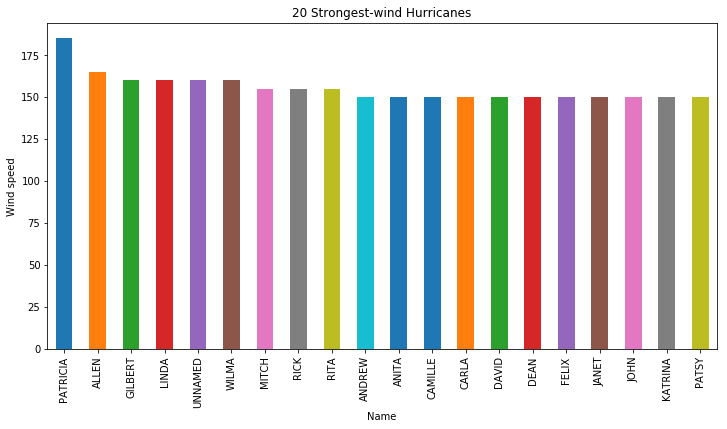

In [12]:
#first groupby Name and then use max and nlargest to plot bar graph
fig, ax11 = plt.subplots()
df.groupby('Name').Wind.max().nlargest(20).plot(kind='bar', figsize=(12,6),ax=ax11)
ax11.set_title('20 Strongest-wind Hurricanes')
ax11.set_ylabel('Wind speed')

### 8) Plot the count of all datapoints by Basin

as a bar chart

Text(0,0.5,'Count')

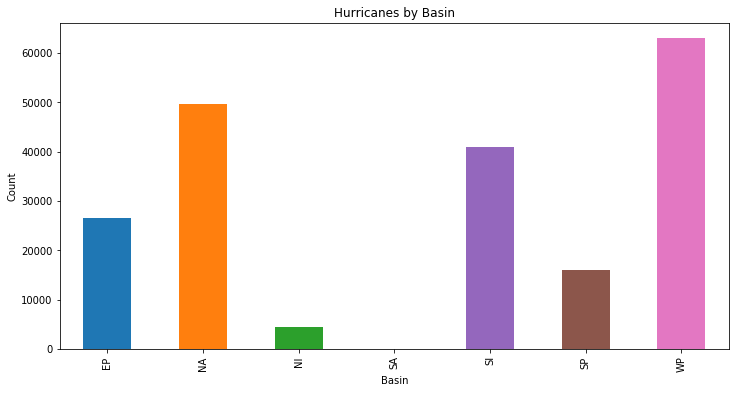

In [13]:
#first groupby basin and then plot bar graph
fig, ax22 = plt.subplots()
df.groupby('Basin').Wind.count().plot(kind='bar', figsize=(12,6),ax=ax22)
ax22.set_title('Hurricanes by Basin')
ax22.set_ylabel('Count')

### 9) Plot the count of unique hurricanes by Basin

as a bar chart. (You will need to call `groupby` twice.)

Text(0,0.5,'Count')

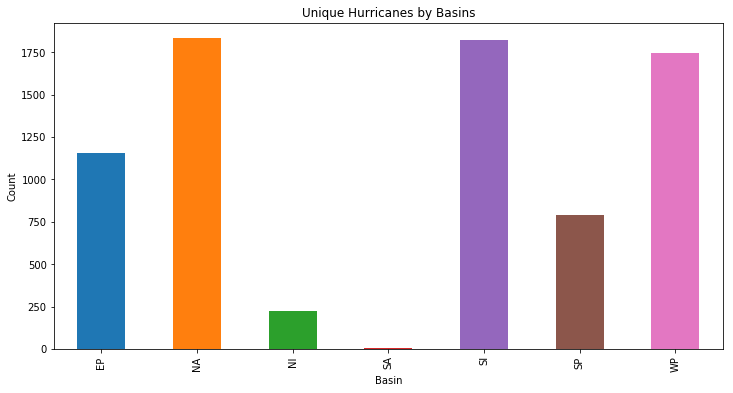

In [15]:
#first group by basin and then find the unique ones
fig, ax33 = plt.subplots()
df.groupby('Basin').Serial_Num.nunique().plot(kind='bar', figsize=(12,6),ax=ax33)
ax33.set_title('Unique Hurricanes by Basins')
ax33.set_ylabel('Count')

### 10) Make a `hexbin` of the location of datapoints in Latitude and Longitude

Text(0.5,1,'Hexbin Location')

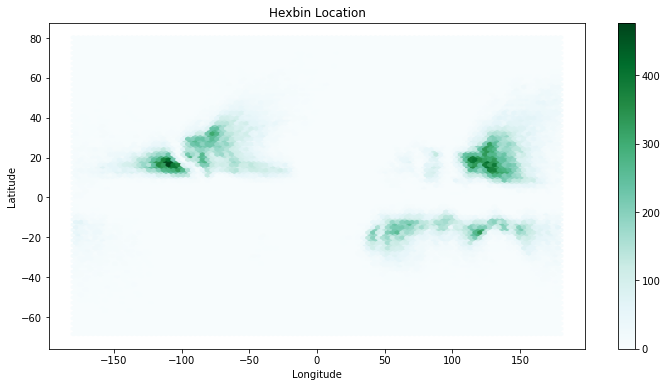

In [16]:
#plot using hexbin()
fig, ax44 = plt.subplots()
df.plot.hexbin(x='Longitude',y='Latitude',figsize=(12,6),ax=ax44)
ax44.set_title('Hexbin Location')

### 11) Find Hurricane Katrina (from 2005) and plot its track as a scatter plot

Use wind speed to color the points.

Text(0.5,1,'Hurrican track')

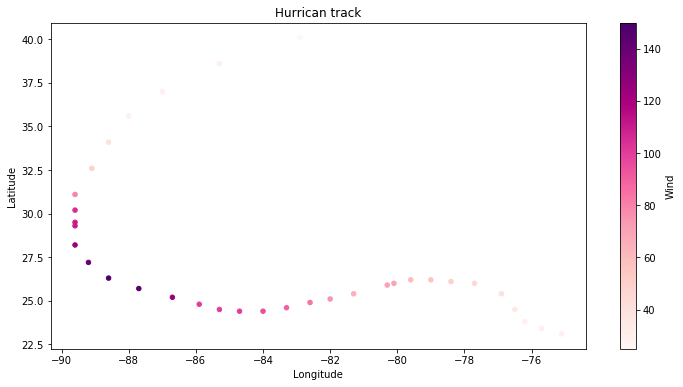

In [21]:
#filter first by year and then by name 'KATRINA'
fig, ax55 = plt.subplots()
df_year = df[df.Season>=2005]
df_kt = df_year[df_year.Name == 'KATRINA']
df_kt.plot(x= 'Longitude', y ='Latitude',c='Wind', cmap= 'RdPu',kind='scatter', figsize=(12,6),ax=ax55)

ax55.set_title('Hurrican track')


### 12) Make time the index on your dataframe

In [22]:
#make time the index
df = df.set_index('ISO_time')
df.head()

,Serial_Num,Season,Num,Basin,Sub_basin,Name,Nature,Latitude,Longitude,Wind,Pres
ISO_time,,,,,,,,,,,
1848-01-11 06:00:00,1848011S09080,1848,2,SI,MM,XXXX848003,NR,-8.6,79.8,0.0,0.0
1848-01-12 06:00:00,1848011S09080,1848,2,SI,MM,XXXX848003,NR,-9.0,78.9,0.0,0.0
1848-01-13 06:00:00,1848011S09080,1848,2,SI,MM,XXXX848003,NR,-10.4,73.2,0.0,0.0
1848-01-14 06:00:00,1848011S09080,1848,2,SI,MM,XXXX848003,NR,-12.8,69.9,0.0,0.0
1848-01-15 06:00:00,1848011S09080,1848,2,SI,MM,XXXX848003,NR,-13.9,68.9,0.0,0.0


### 13) Plot the count of all datapoints per year as a timeseries

You should use `resample`

Text(0,0.5,'Count')

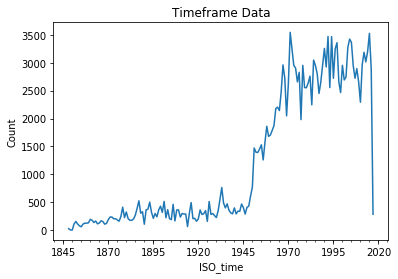

In [27]:
#Resample it in years as timeseries
fig,ax66 = plt.subplots()
df.resample('Y').Wind.count().plot(ax=ax66)
ax66.set_title('Timeframe Data')
ax66.set_ylabel('Count')

### 14) Plot all tracks from the North Atlantic in 2005

You will probably have to iterate through a `GroupBy` object

Text(0,0.5,'Latitude')

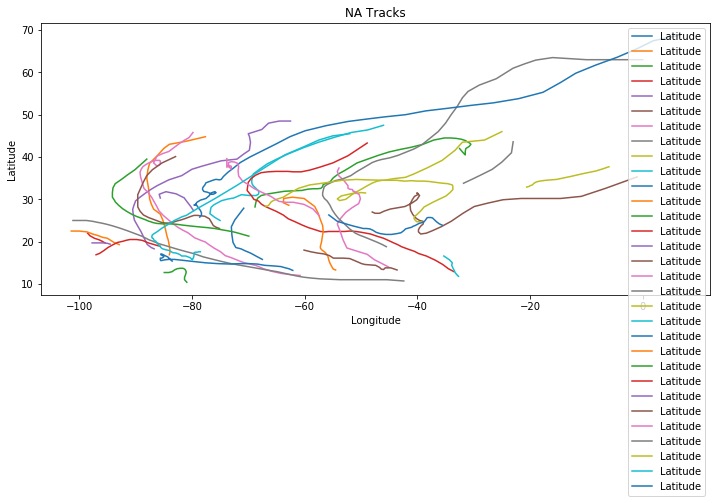

In [28]:
#filter first in year 2005 and then in NA basin
df_year = df[df.Season==2005]
df_yearr = df_year[df_year.Basin=='NA']

gb = df_yearr.groupby('Name')

fig, ax = plt.subplots(figsize=(12, 5))

#iterate through Groupby project and then finalize the graph
for key,group in gb:
    group.plot(ax=ax,x= 'Longitude', y ='Latitude')

ax.set_title('NA Tracks')
ax.set_ylabel('Latitude')

### 15) Create a filtered dataframe that contains only data since 1970 from the North Atlantic ("NA") Basin

Use this for the rest of the assignment

In [29]:
#filter data from after 1970 and then in NA basin
df_year = df[df.Season>=1970]
df = df_year[df_year.Basin == 'NA']
df.head()

,Serial_Num,Season,Num,Basin,Sub_basin,Name,Nature,Latitude,Longitude,Wind,Pres
ISO_time,,,,,,,,,,,
1970-05-17 18:00:00,1970138N12281,1970,1,NA,CS,ALMA,TS,11.5,-79.0,25.0,0.0
1970-05-18 00:00:00,1970138N12281,1970,1,NA,CS,ALMA,TS,11.7,-79.2,25.0,0.0
1970-05-18 06:00:00,1970138N12281,1970,1,NA,CS,ALMA,TS,12.1,-79.7,25.0,0.0
1970-05-18 12:00:00,1970138N12281,1970,1,NA,CS,ALMA,TS,12.3,-80.1,25.0,1007.0
1970-05-18 18:00:00,1970138N12281,1970,1,NA,CS,ALMA,TS,12.5,-80.5,25.0,0.0


### 16) Plot the number of datapoints per day

Make sure you figure is big enough to actually see the plot

Text(0,0.5,'Count')

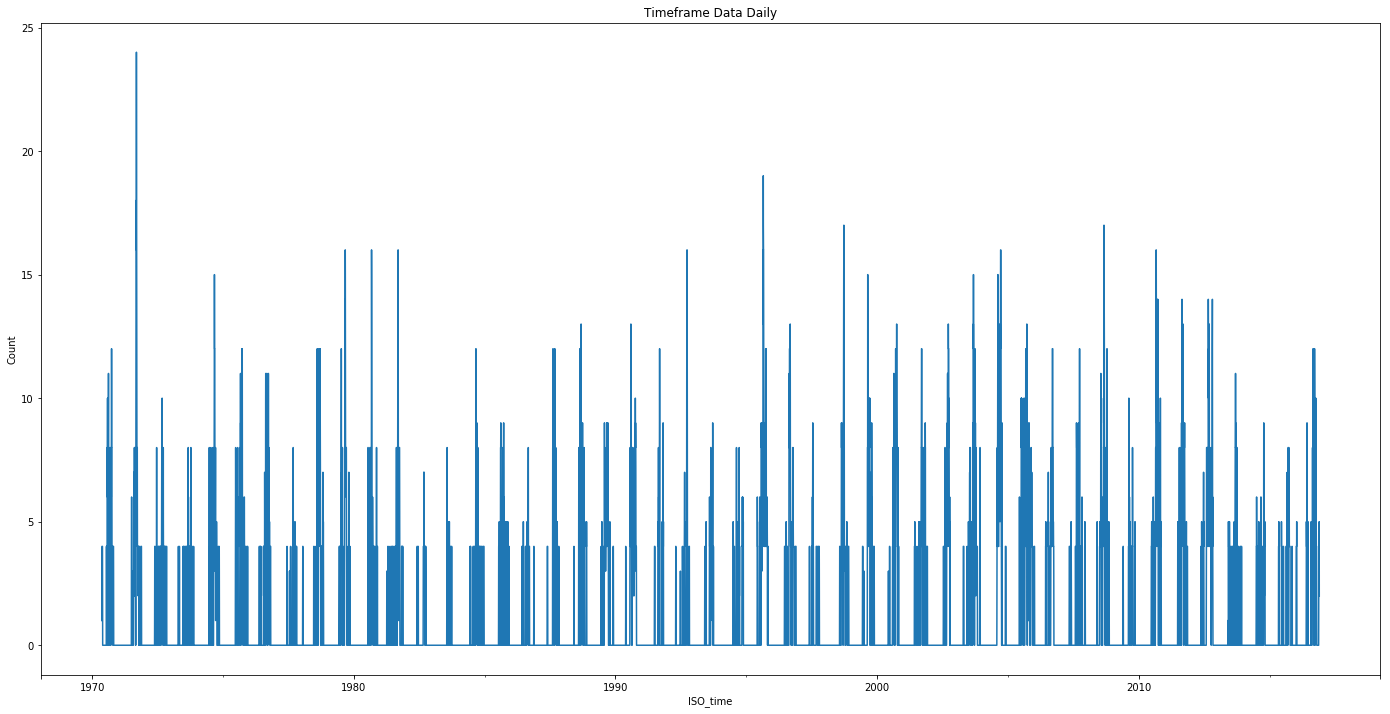

In [32]:
#resample data by day
fig,ax77 = plt.subplots()
cl = df.resample('D').Wind.count()
df.resample('D').Wind.count().plot(figsize=(24,12))
ax77.set_title('Timeframe Data Daily')
ax77.set_ylabel('Count')

### 17) Calculate the climatology of datapoint counts as a function of `dayofyear`

Plot the mean and standard deviation on a single figure

Text(0,0.5,'Data')

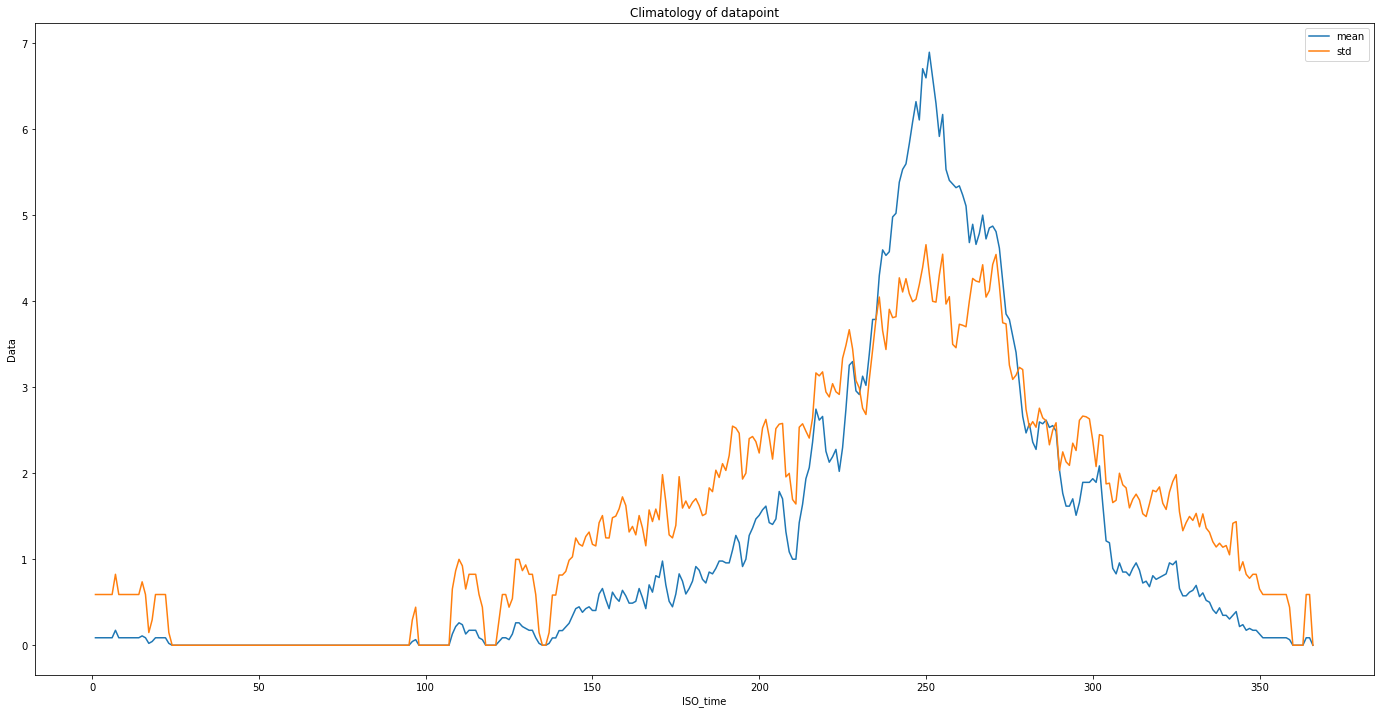

In [33]:
#groupby aggregate and finalize the plot
fig, ax1 = plt.subplots(figsize=(24,12))
cl.groupby(cl.index.dayofyear).aggregate([np.mean,np.std]).plot(ax=ax1)   
ax1.set_title('Climatology of datapoint')
ax1.set_ylabel('Data')

### 18) Use `transform` to calculate the anomaly of daily counts from the climatology

Resample the anomaly timeseries at annual resolution and plot

Text(0,0.5,'Anomaly')

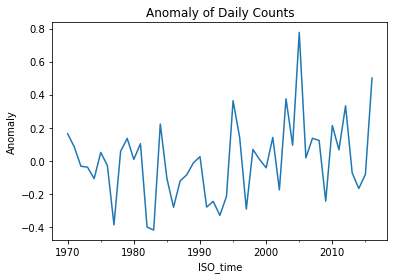

In [35]:
#create a plot and use standardize function
fig,ax88 = plt.subplots()
def standardize(x):
    return (x - x.mean())/x.std()

#find anomaly using transform and finalize the plot
anomaly = cl.groupby(cl.index.dayofyear).transform(standardize)
Annual_anomaly= anomaly.resample('Y').mean()
Annual_anomaly.plot()
ax88.set_title('Anomaly of Daily Counts')
ax88.set_ylabel('Anomaly')

Which years stand out as having anomalous hurricane activity?

In [ ]:
#from the graph above, we learn that 2005 has the most anomalous activity!